# 4. Изучение закономерностей, определяющих успешность игр

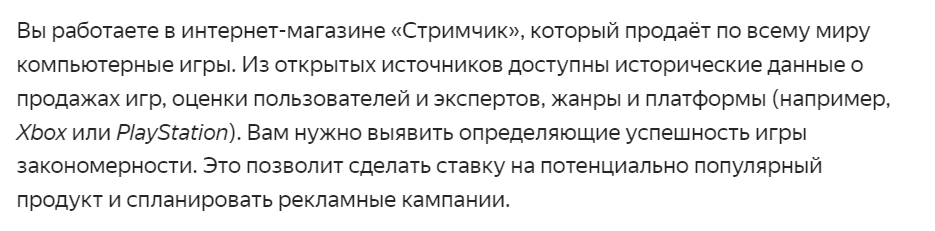

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/games.csv')
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29

In [2]:
# check
def isna_view (df):
    return  (
                (df.isna().mean()*100)
                .sort_values(ascending=False)
                .to_frame()
                .rename(columns = {0:'percent_space'})
                .style.background_gradient('coolwarm').format("{:.1f}")
            )

isna_view (data)

,percent_space
Critic_Score,51.3
Rating,40.5
User_Score,40.1
Year_of_Release,1.6
Name,0.0
Genre,0.0
Platform,0.0
NA_sales,0.0
EU_sales,0.0
JP_sales,0.0


In [3]:
data.columns = data.columns.str.lower()

В данных по оценкам пользователей закралась подозрительная оценка tbd, которая как оказалось связана с тем, что нет ещё данных, значит спокойно можно заменить эти значения на 0.

In [4]:
data.loc[data['user_score']=='tbd', 'user_score'] = 0
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [5]:
data = data.query('year_of_release.isna() == False')
data['year_of_release'] = data['year_of_release'].astype('int32')
data['user_score'] = pd.to_numeric(data['user_score'])

data = data.reset_index(drop=True)
for i in range(len(data['name'])):
    for k in data['genre'].unique():
        if data['genre'][i] == k:
            data.loc[data['critic_score'].isna(), 'critic_score'] = data.loc[data['genre'] == k, 'critic_score'].median()
            data.loc[data['user_score'].isna(), 'user_score'] = data.loc[data['genre']==k, 'user_score'].median()

data['critic_score'] = data['critic_score'].astype('int32')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16446 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int32  
 9   user_score       16446 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


Заменили тип столбца с годом выпуска на целочисленный, потому что там только целые года. Также сделали с оценкой критиков, предварительно заполнив пропуски медианными оценкмаи по схожим жанрам. По оценке пользователей изменили тип со строкового на вещественный.

In [6]:
data = data.query('name.isna() == False')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16445
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.4+ MB


Нет смысла анализировать данные, где нет имени игры, поэтому удалим их. А пропуска в возрастном рейтинге нельзя заполнить ни средним, ни медианой, так как это зависит от контента игры, который нам не доступен для анализа.

In [7]:
data['sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

data['rating'] = data['rating'].fillna('Нет рейтинга')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16445
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int32  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  sum              16444 non-null  float64
dtypes: float64(6), int32(2), object(4)
memory usage: 1.5+ MB


Посчитали суммарные продажи и занесли в новый столбик sum

### check eda

In [8]:
data['year_of_release'].max()-data['year_of_release'].min()
data['year_of_release'].max()
data['year_of_release'].min()

1980

In [9]:
def period(row):
    year = row['year_of_release']
    if year < 1990:
        return'восьмидесятые'
    elif year < 2000:
        return 'девяностые'
    elif year < 2010:
        return 'нулевые'
    else:
            return 'десятые'
        
    
data['period'] = data.apply(period, axis=1)
data.info

<bound method DataFrame.info of                                 name platform  year_of_release         genre  \
0                         Wii Sports      Wii             2006        Sports   
1                  Super Mario Bros.      NES             1985      Platform   
2                     Mario Kart Wii      Wii             2008        Racing   
3                  Wii Sports Resort      Wii             2009        Sports   
4           Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
...                              ...      ...              ...           ...   
16441  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16442               LMA Manager 2007     X360             2006        Sports   
16443        Haitaka no Psychedelica      PSV             2016     Adventure   
16444               Spirits & Spells      GBA             2003      Platform   
16445            Winning Post 8 2016      PSV             2016    Simulation   

       

Создадим новый столбец, где присвоим период выхода(эпоху), в зависимости от года релиза

<AxesSubplot:>

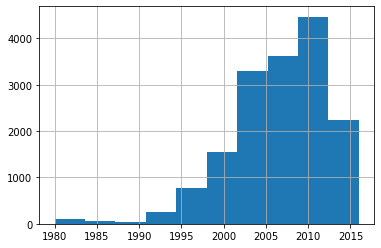

In [10]:
data['year_of_release'].hist()

<AxesSubplot:>

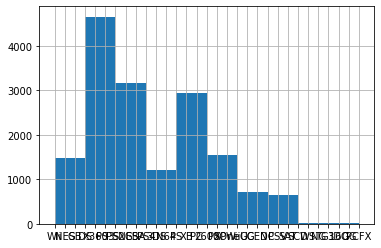

In [11]:
data['platform'].hist()

In [12]:
print(data.pivot_table(index='platform', values='sum', aggfunc='sum').sort_values(by='sum', ascending=False))

              sum
platform         
PS2       1233.56
X360       961.24
PS3        931.34
Wii        891.18
DS         802.78
PS         727.58
PS4        314.14
GBA        312.88
PSP        289.53
3DS        257.81
PC         255.76
GB         254.43
XB         251.57
NES        251.05
N64        218.01
SNES       200.04
GC         196.73
XOne       159.32
2600        86.48
WiiU        82.19
PSV         53.81
SAT         33.59
GEN         28.35
DC          15.95
SCD          1.86
NG           1.44
WS           1.42
TG16         0.16
3DO          0.10
GG           0.04
PCFX         0.03


<AxesSubplot:xlabel='year_of_release'>

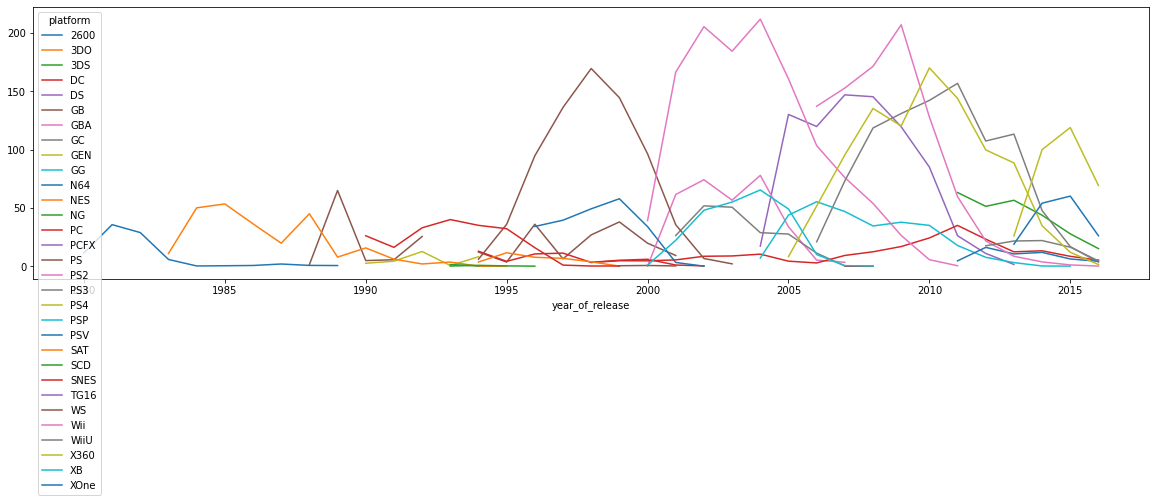

In [13]:
data.pivot_table(index='year_of_release', columns='platform', values='sum', aggfunc='sum').plot(figsize=(20, 5))

Возьмём данные за последние 5 лет, они будут самые актуальные

<AxesSubplot:xlabel='year_of_release'>

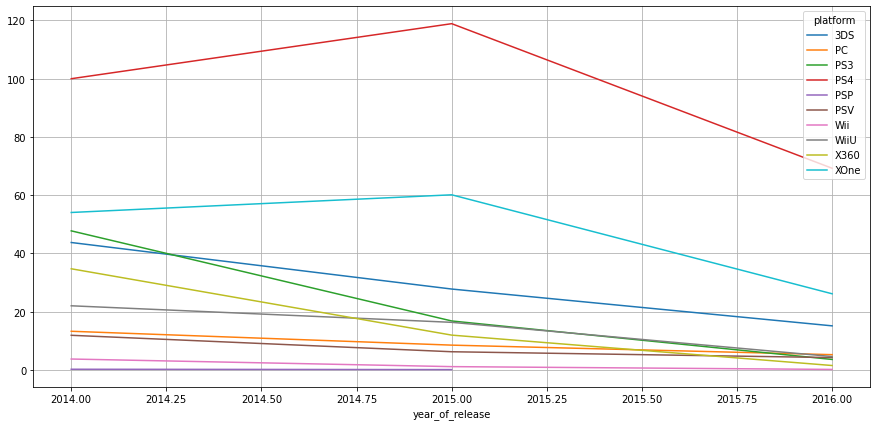

In [14]:
data = data.query('2014 <= year_of_release <= 2016')
data.pivot_table(index='year_of_release', columns = 'platform', values='sum', aggfunc='sum').plot(grid=True, figsize=(15, 7))

Основные продажи приходтся на PS4 и Xbox One. В таблице оставим данные только за последние 2 года. Потенциально прибыльными можно назвать PS4, Xbox One и Nintendo 3DS - топ 3 по продажам. Также не будем забывать про всеми любимые компьютерные игры, поэтому включим платформу PC в нашу подборку.

<AxesSubplot:xlabel='year_of_release'>

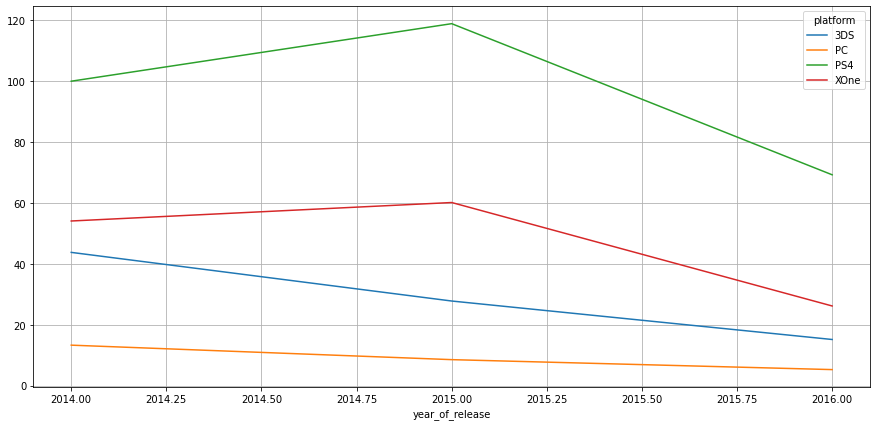

In [15]:
data_all = data.query('2014 <= year_of_release <= 2016')
data = data.query('platform == ["PS4", "XOne", "3DS", "PC"]')
data.pivot_table(index='year_of_release', columns = 'platform', values='sum', aggfunc='sum').plot(grid=True, figsize=(15, 7))

Построим график распределения продаж по годам по выбранным платформам. Предварительно сохраним данные 

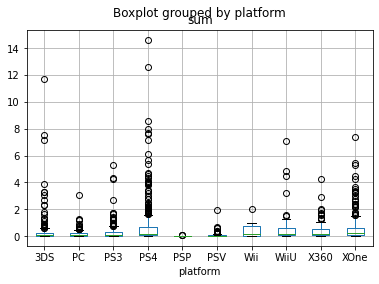

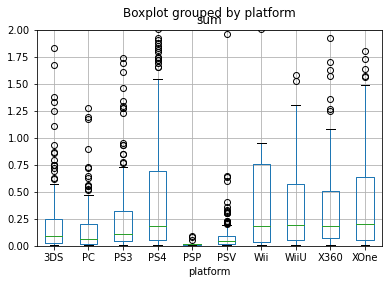

In [16]:
data_all.boxplot(column='sum', by='platform')
plt.show()
data_all.boxplot(column='sum', by='platform')
plt.ylim(0,2)
plt.show()

Видно очень много болших выбросов. Их нет в таком количестве только у PSP, PSV, PC и Wii. Скорее всего такие выбросы связаны с тем, что есть игры, которые сильно выстреливали и пользовались большой популярностью.

Построим на двух графиках как влияют оценки пользователей и критиков на продажи игр на примере PS4.


0.30537767398717236


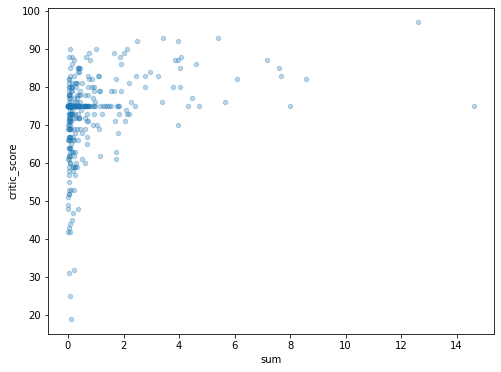

In [17]:
data.query('platform == "PS4"').plot(x='sum', y='critic_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "PS4"]['sum'].corr(data['critic_score']))

0.02116190895663098


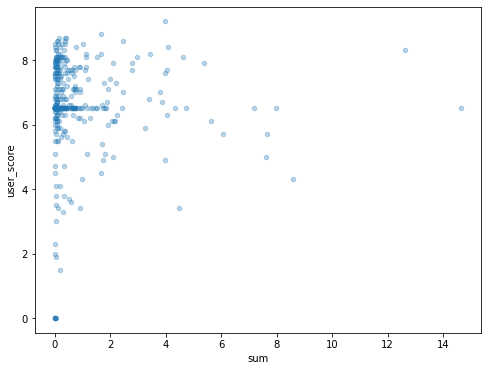

In [18]:
data.query('platform == "PS4"').plot(x='sum', y='user_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "PS4"]['sum'].corr(data['user_score']))

Какой можно сделать вывод? Мнение критиков немного учитывают, но это не ключевой фактор. А если говорить об оценках пользователей, то никакой зависимости и нет. Оно и верно, что у этих игроков на уме.

0.05843144613622935
0.342678496052774
0.0795704321339885
0.1167396665019866


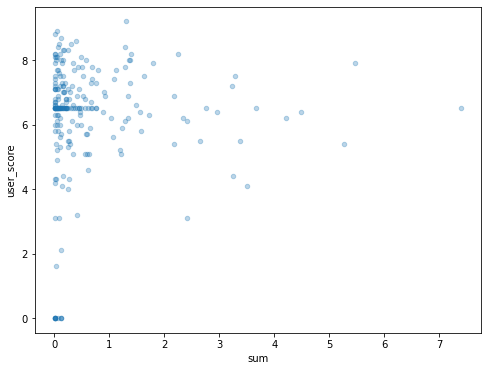

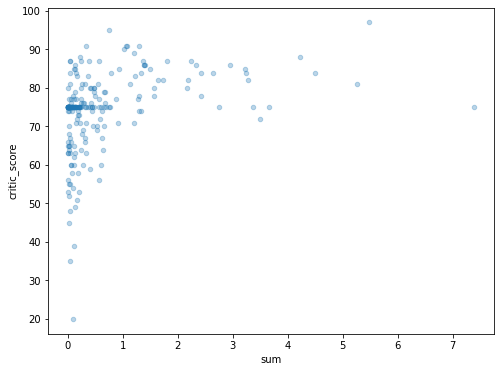

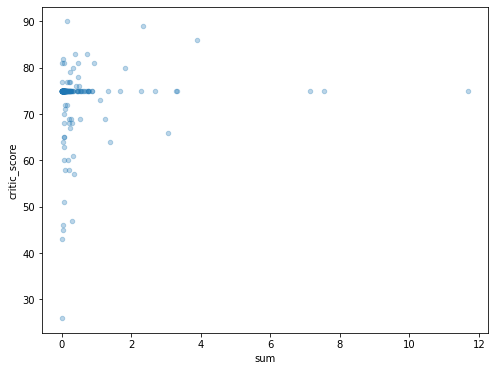

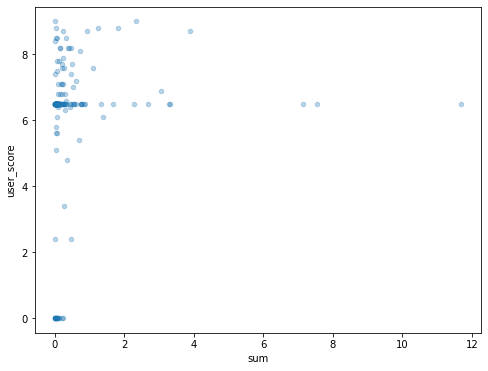

In [19]:
data.query('platform == "XOne"').plot(x='sum', y='user_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "XOne"]['sum'].corr(data['user_score']))
data.query('platform == "XOne"').plot(x='sum', y='critic_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "XOne"]['sum'].corr(data['critic_score']))
data.query('platform == "3DS"').plot(x='sum', y='critic_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "3DS"]['sum'].corr(data['critic_score']))
data.query('platform == "3DS"').plot(x='sum', y='user_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "3DS"]['sum'].corr(data['user_score']))

0.1723845165979022
-0.0033765170331359917


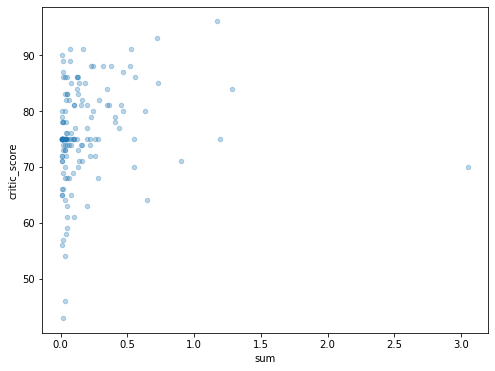

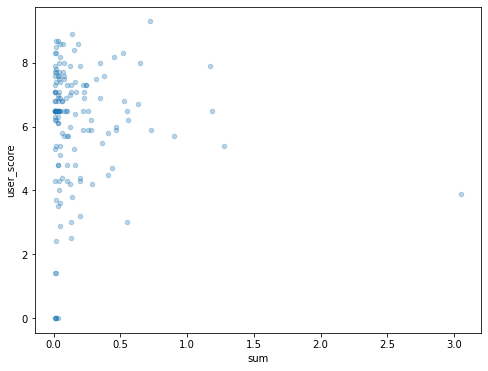

In [20]:
data.query('platform == "PC"').plot(x='sum', y='critic_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "PC"]['sum'].corr(data['critic_score']))
data.query('platform == "PC"').plot(x='sum', y='user_score', kind='scatter', alpha=0.3, figsize=(8, 6), sharex=False)
print(data[data['platform'] == "PC"]['sum'].corr(data['user_score']))

При сравнении с другими платформами выяснилась интересная вещь. Если между PS4 и XOne отличий практически нет, то вот на 3DS картина совершенно другая, нет никакой зависимости от оценек критиков и присутствует небольшая корреляция.

Также, раз мы добавили Пк в свою подборку, то и по ней посмотрим влияние. Но картина таже самая, по графику и по коэффиценту корреляции видно, что зависимости нет.

<AxesSubplot:xlabel='year_of_release'>

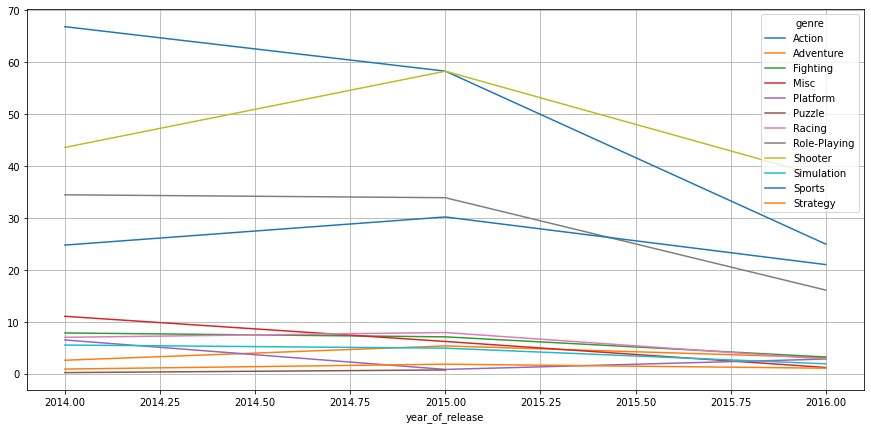

In [21]:
data.pivot_table(index='year_of_release', columns = 'genre', values='sum', aggfunc='sum').plot(grid=True, figsize=(15, 7))

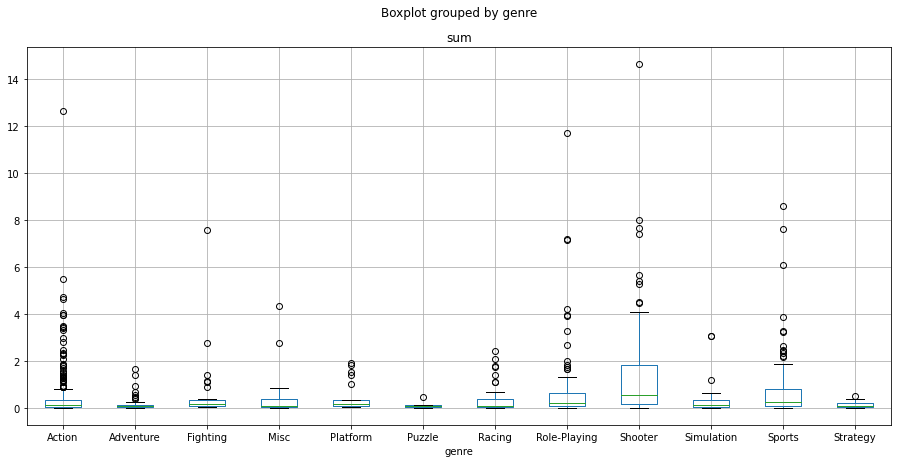

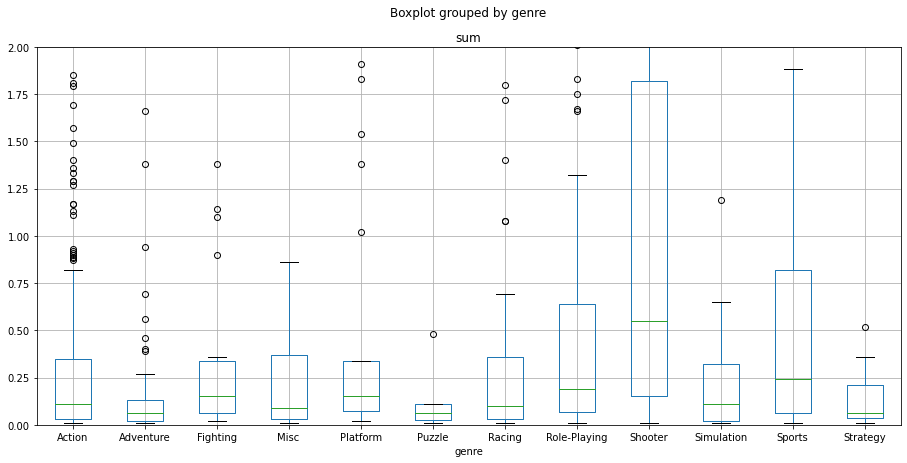

In [22]:
data.boxplot(column='sum', grid=True, figsize=(15, 7), by='genre')
plt.show()
data.boxplot(column='sum', grid=True, figsize=(15, 7), by='genre')
plt.ylim(0,2)
plt.show()

Самый прибыльные жанры - Action, Shooter, Sports, Role-Playing. А антилидеры - Strategy, Simulation, Puzzle, platform, adventure.

Также очевидно, что Action - бесспорный лидер, и медиана самая высокая и ряд распределения хороший.

### check top

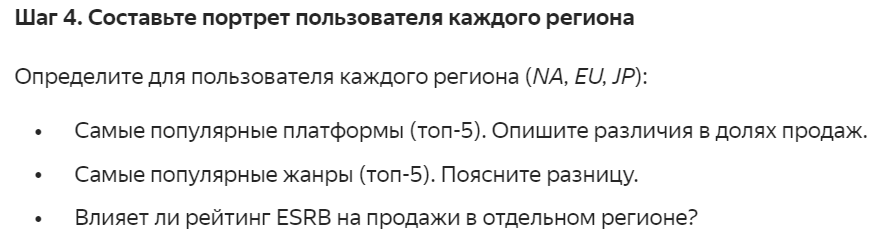

Итак, картина по топу платформ обстоит так: в северной америке - PS4, XOne, 3DS, WiiU, PC. В европе - PS4, XOne, PC, 3DS, WiiU. В Японии - XOne, PS4, PSV, PS3, WiiU. Японцы странные всё-таки люди, самая популярная платформа xbox, не поддерживают отечественных производителей. Но зато весь остальной топ твёрдо взял Японцами.

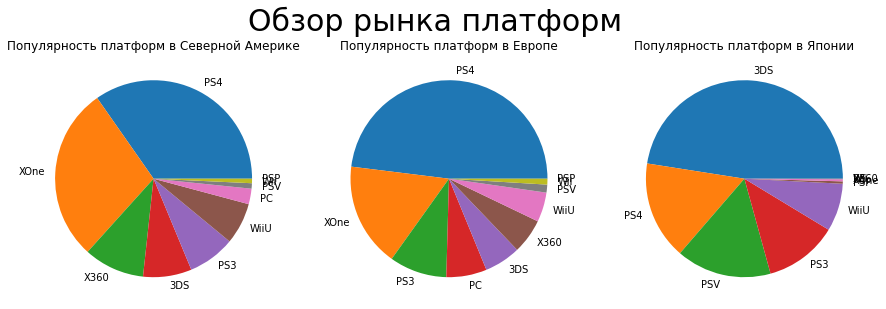

In [23]:
import numpy as np
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Обзор рынка платформ', fontsize=30)
na = data_all.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).reset_index()
#other = data_all.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales').head(5)
#print(other)
axs[0].pie(na['na_sales'], labels=na['platform'])
axs[0].set_title("Популярность платформ в Северной Америке")
eu = data_all.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).reset_index()
axs[1].pie(eu['eu_sales'], labels=eu['platform'])
axs[1].set_title("Популярность платформ в Европе")
jp = data_all.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).reset_index()
axs[2].pie(jp['jp_sales'], labels=jp['platform'])
axs[2].set_title("Популярность платформ в Японии")
plt.show()

In [24]:
na

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05
5,WiiU,19.36
6,PC,7.23
7,PSV,2.52
8,Wii,2.08
9,PSP,0.00


In [28]:
print(data_all.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales', ascending=False).head(5))
print(data_all.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales', ascending=False).head(5))
print(data_all.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales', ascending=False).head(5))


              na_sales
genre                 
Shooter          79.02
Action           72.53
Sports           46.13
Role-Playing     33.47
Misc             15.05
              eu_sales
genre                 
Action           74.68
Shooter          65.52
Sports           45.73
Role-Playing     28.17
Racing           14.13
              jp_sales
genre                 
Role-Playing     31.16
Action           29.58
Fighting          6.37
Misc              5.61
Shooter           4.87


Итак, топ-5 категорий в Северной Америке - Action, Shooter, Sports, Role-Playing, Misc. В Европе - Action, Shooter, Sports, Role-Playing, Racing. В Японии - Role-Playing, Action, Misc, Fighting, Shooter. Япония опять отличается от других, ох уж эти любители аниме, хотя в Tekken я бы тоже поиграл.

<AxesSubplot:xlabel='rating', ylabel='млн копий'>

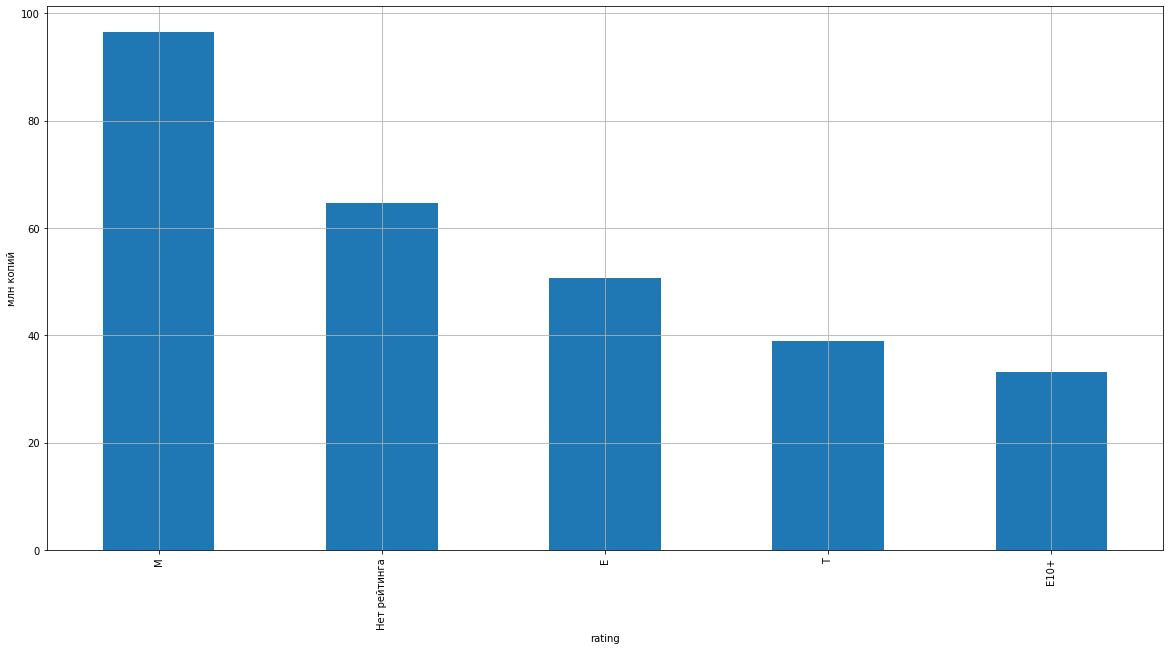

In [29]:
rating_na = data_all.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(x = 'rating', y = 'na_sales', kind = 'bar', figsize=(20,10), grid=True, ylabel='млн копий')


В америке большим спросом пользуются игры с оценкой M и без рейтинга

<AxesSubplot:xlabel='rating', ylabel='млн копий'>

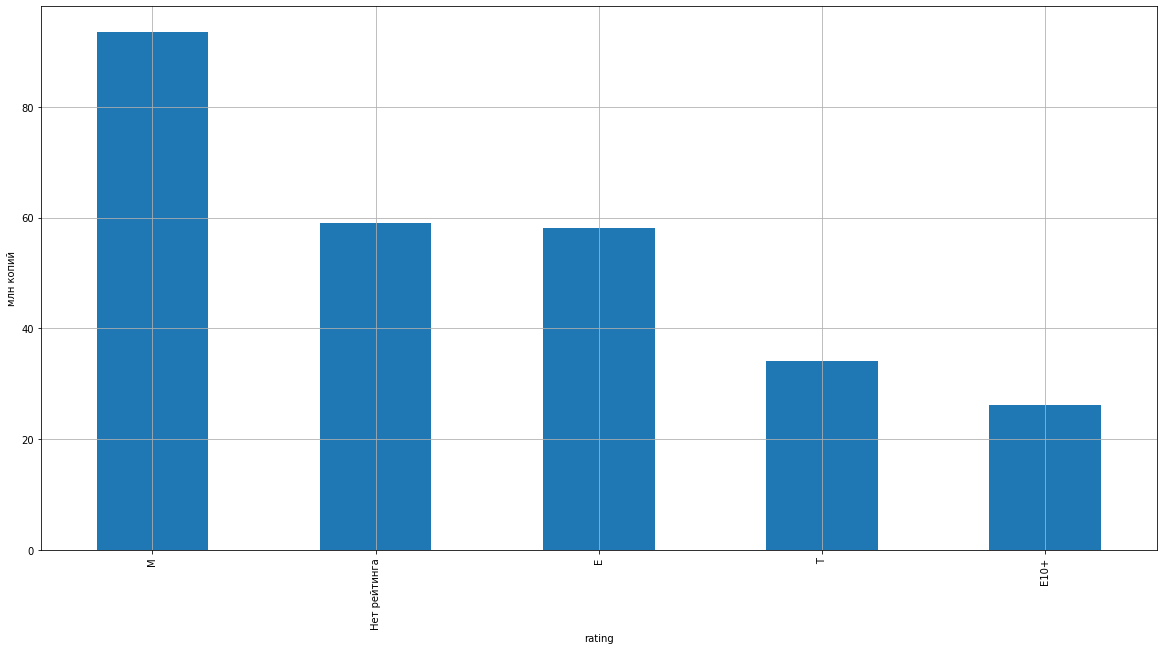

In [30]:
rating_eu = data_all.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(x = 'rating', y = 'eu_sales', kind = 'bar', figsize=(20,10), grid=True, ylabel='млн копий')


В Европе большим спросом пользуются игры с оценкой M и без рейтинга

<AxesSubplot:xlabel='rating', ylabel='млн копий'>

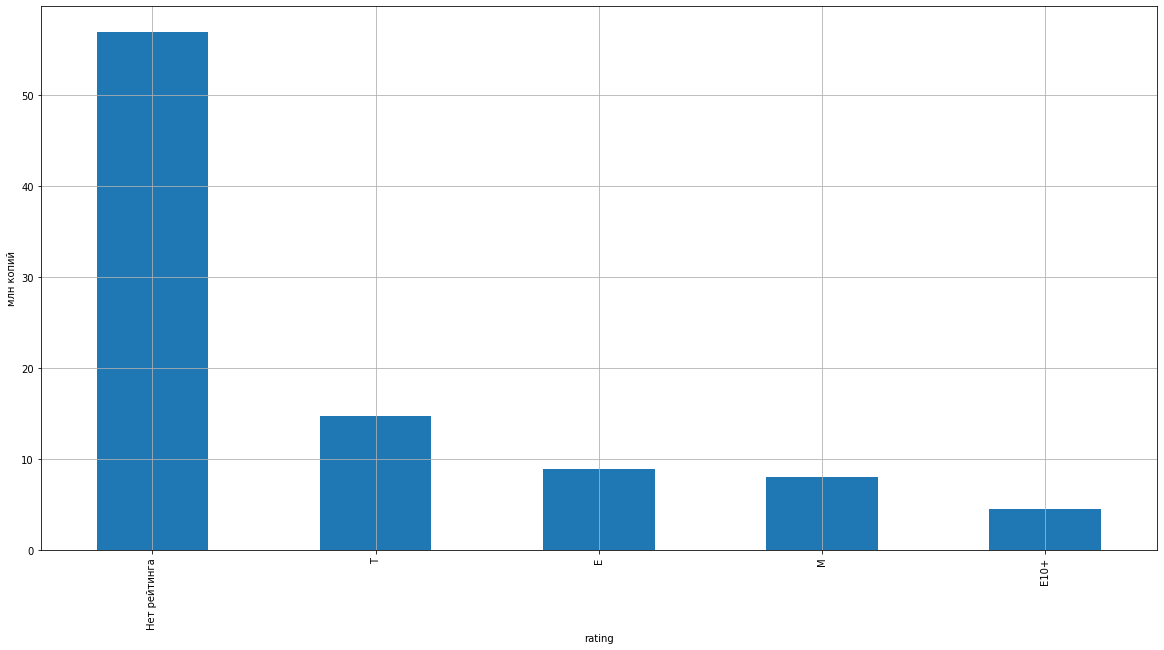

In [31]:
rating_jp = data_all.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(x = 'rating', y = 'jp_sales', kind = 'bar', figsize=(20,10), grid=True, ylabel='млн копий')

В Японии ОГРОМНЫМ спросом пользуются игры без рейтинга. Ох уж эти японцы

### check hypo

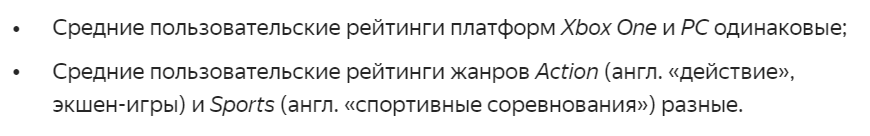

Для первого: 
H0: средние рейтинги по платформам одинаковые
H1: средние рейтинги по платформам разные

Для второго:
H0: средние рейтинги по жанрам одинаковые
H1: средние рейтинги по жанрам разные

In [32]:
from scipy import stats as st
data_xone = data_all[data_all['platform'] == 'XOne']
data_pc = data_all[data_all['platform'] == 'PC']
xbox_score = data_xone['user_score']
pc_score = data_pc['user_score']

alpha = 0.05 

results = st.ttest_ind(xbox_score, pc_score)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
    

action = data_all[data_all['genre'] == 'Action']
sports = data_all[data_all['genre'] == 'Sports']
action_score = action['user_score']
sports_score = sports['user_score']

results = st.ttest_ind(action_score, sports_score)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.49672524026674514
Не получилось отвергнуть нулевую гипотезу
p-значение: 1.8949744195788547e-10
Отвергаем нулевую гипотезу


Итак, в ходе проверки гипотез мы получили, что в случае первой гипотезы, что средние пользовательские оценки XBox и PC одинаковы, следующий результат - гипотезу отвергнуть не удалось, так как с вероятностью 49% различие между оценками могло быть получено случайно. В случае второй гипотезы про различие средних оценок жанра Action и Sports - гипотеза не отвергается, так как с малой долей вероятности результат мог был получен случайно.

Общий вывод: самые популярные платформы PS4 и Xone, жанры - Action, Shooter, Sports, Role-Playing. Причём стоит учесть, что на продажи влияет рейтинг игры, в частноти в Америке - M и без рейтинга, в  Европе - всё тоже самое, Японии - T и E. По оценкам: пользовательские оценки игр на платформах XOne и PC - одинаковы, в случае оценок по жанрам у Action и Sports - разные. 

Если бы я принимал решение о стратегии на 17 год, то я бы сделал основной упор на игры для PS4 и PS5, в жанре Action, Shooter, Sports, Role-Playing. С рейтингами M, T, E.